In [42]:
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
pd.set_option('display.max_rows',15)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_colwidth',15)

In [67]:
df = pd.read_csv('train (2).csv')

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.groupby(['Survived','Sex','Pclass']).agg({'Age':'mean','Survived':'sum'}).round(2)

Age  Survived
Survived Sex    Pclass                 
0        female 1       25.67         0
                2       36.00         0
                3       23.82         0
         male   1       44.58         0
                2       33.37         0
                3       27.26         0
1        female 1       34.94        91
                2       28.08        70
                3       19.33        72
         male   1       36.25        45
                2       16.02        17
                3       22.27        47

In [7]:
df.groupby('Survived').agg({'Survived':'sum','Age':'mean','Fare':'mean'}).round(4)

,Survived,Age,Fare
Survived,,,
0,0,30.6262,22.1179
1,342,28.3437,48.3954


In [9]:
df.groupby(['Survived','Pclass']).agg({'Survived':'sum'}).round(4)

Survived
Survived Pclass          
0        1              0
         2              0
         3              0
1        1            136
         2             87
         3            119

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [260]:
df[df['Age']>40].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, ...",male,40.0,0,0,PC 17601,27.7208,NaN,C
40,41,0,3,"Ahlin, Mrs....",female,40.0,1,0,7546,9.4750,NaN,S
161,162,1,2,"Watt, Mrs. ...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
188,189,0,3,"Bourke, Mr....",male,40.0,1,1,364849,15.5000,NaN,Q
209,210,1,1,"Blank, Mr. ...",male,40.0,0,0,112277,31.0000,A31,C
263,264,0,1,"Harrison, M...",male,40.0,0,0,112059,0.0000,B94,S
319,320,1,1,"Spedden, Mr...",female,40.0,1,1,16966,134.5000,E34,C
346,347,1,2,"Smith, Miss...",female,40.0,0,0,31418,13.0000,NaN,S
360,361,0,3,"Skoog, Mr. ...",male,40.0,1,4,347088,27.9000,NaN,S
561,562,0,3,"Sivic, Mr. ...",male,40.0,0,0,349251,7.8958,NaN,S


In [7]:
sort_1 = pd.pivot_table(df,['Fare','Survived','Age'],['Ticket', 'Sex','Parch']).sort_values('Age')

In [259]:
sort_1

,,,Age,Fare,Survived
Ticket,Sex,Parch,,,
2625,male,1,0.42,8.5167,1.0
250649,male,1,0.67,14.5000,1.0
248738,male,2,0.83,29.0000,1.0
113781,male,2,0.92,151.5500,1.0
2653,female,2,1.00,15.7417,1.0
...,...,...,...,...,...
SOTON/OQ 392082,male,0,NaN,8.0500,0.0
SOTON/OQ 392086,male,0,NaN,8.0500,0.0
W./C. 6607,female,2,NaN,23.4500,0.0


In [9]:
sort_1[sort_1['Fare']>70].sort_values('Survived')

,,,Age,Fare,Survived
Ticket,Sex,Parch,,,
19877,male,0,36.00,78.8500,0.0
PC 17483,male,0,NaN,221.7792,0.0
WE/P 5735,male,1,70.00,71.0000,0.0
19950,male,4,64.00,263.0000,0.0
35273,male,2,58.00,113.2750,0.0
...,...,...,...,...,...
19943,male,0,38.00,90.0000,1.0
PC 17756,female,1,39.00,83.1583,1.0
110413,female,1,39.00,79.6500,1.0


In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

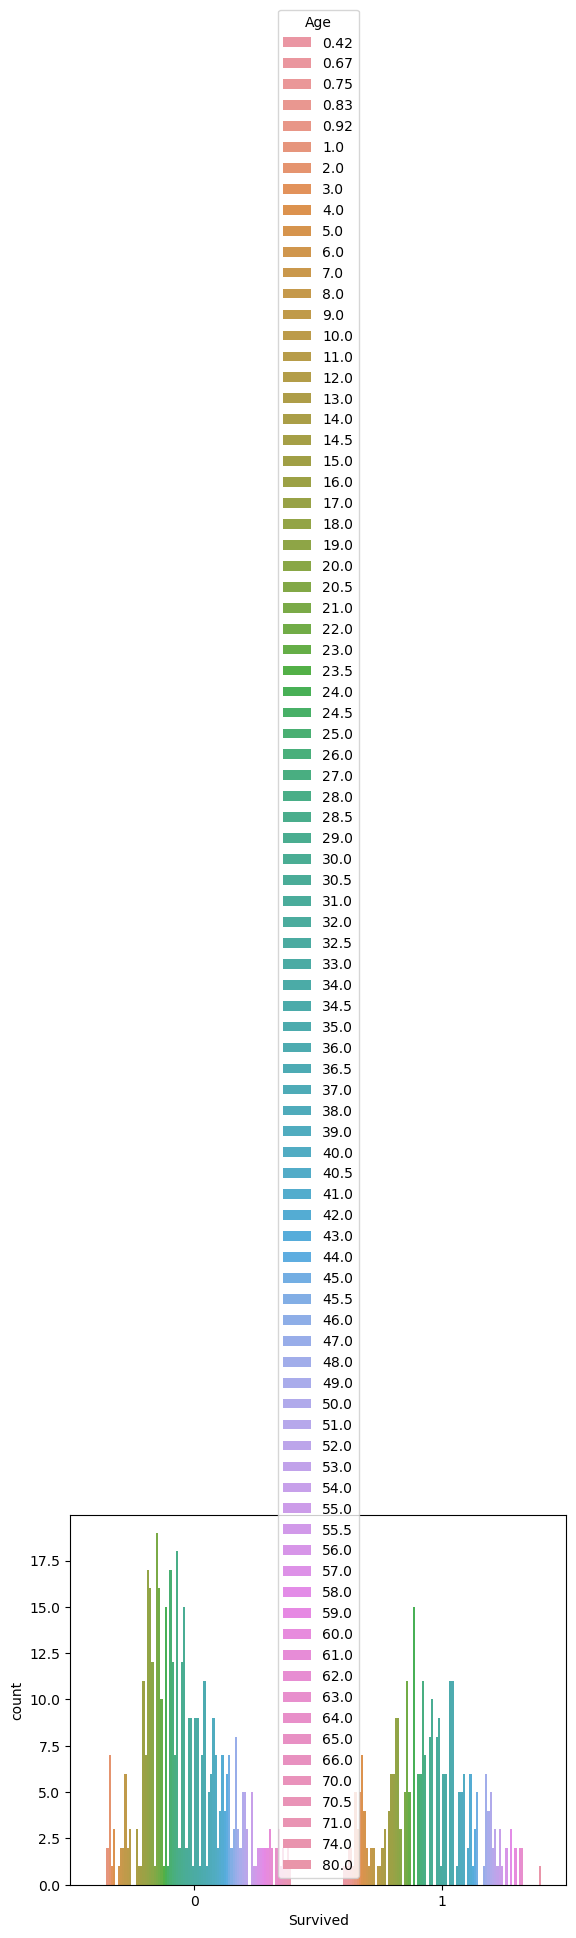

In [33]:
sns.countplot(df['Survived'], x = df.Survived, hue=df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

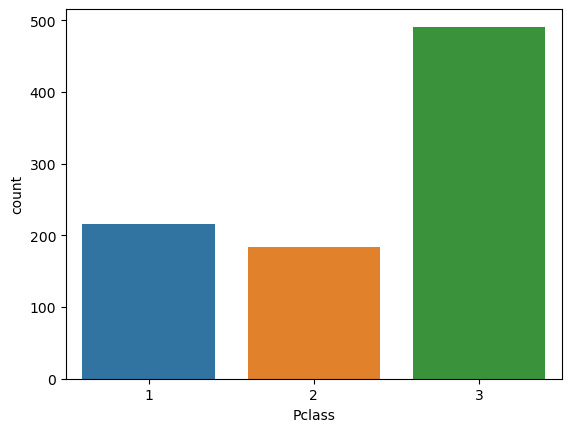

In [38]:
sns.countplot(data['Pclass'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

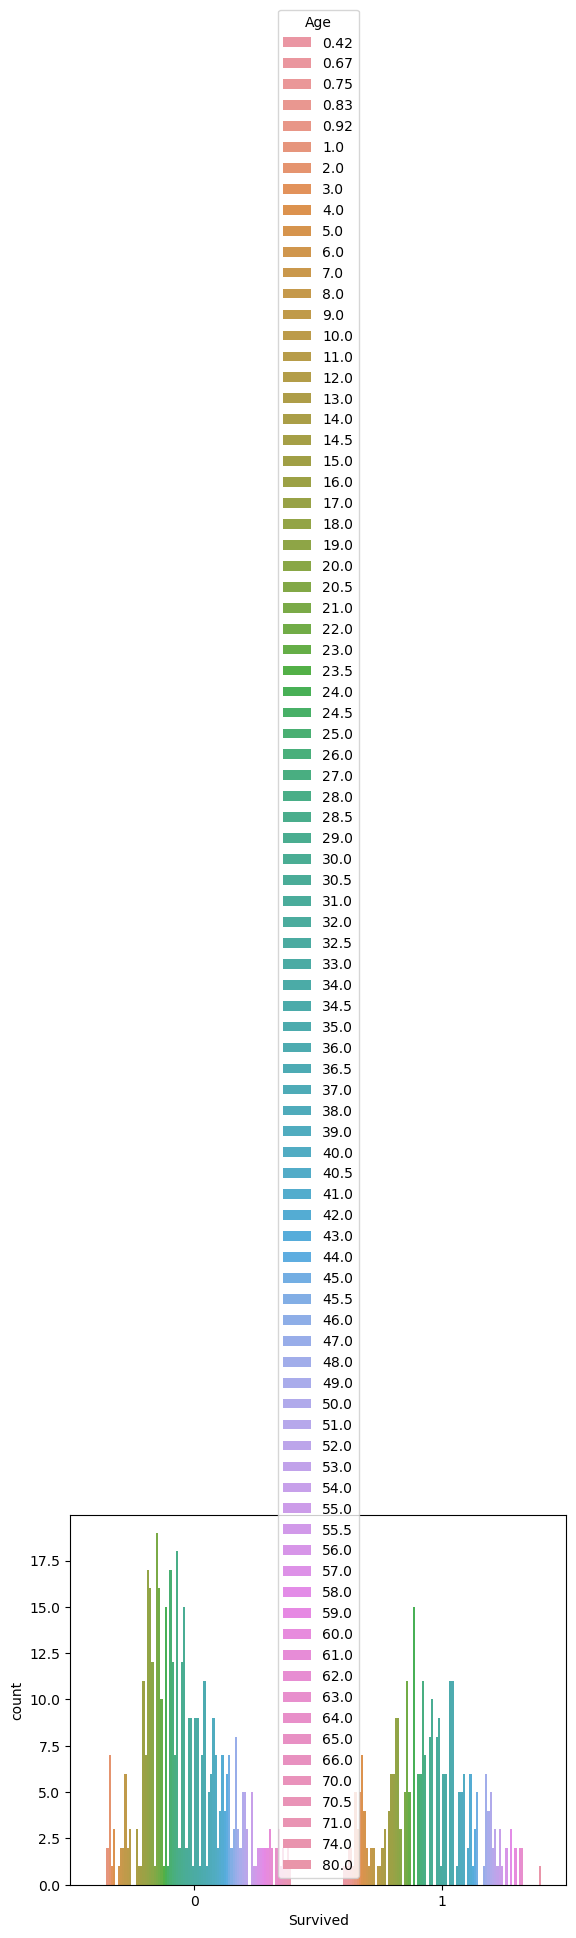

In [41]:
sns.countplot(df['Survived'], x = df., hue=df['Age'])

In [69]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [87]:

fig = px.bar(df, x="Sex", y=df["Age"]>50, color="Pclass", title="Survived")
fig.show()

In [102]:

fig = px.pie(df, values='Age', names='Survived', title='Sex')
fig.show()

In [107]:
fig = px.line(df, x="Age", y="Pclass", color='Survived')
fig.show()